#### The code in this notebook is entirely for making example plots to use in the technical background of the report  
### This notebook doesn't have any relation to the overall firewall project

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Logistic regression

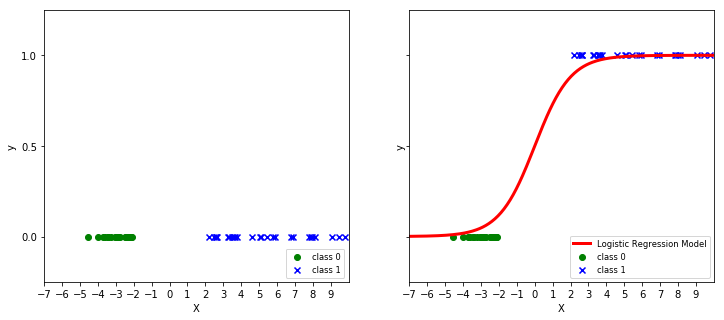

In [72]:
xmin, xmax = -7, 5
n = 50
np.random.seed(0)
X = np.random.normal(size=n)
y = (X > 0).astype(np.float)
X[X >= 0] *= 4
X[X >= 0] += 2
X[X < 0] -= 2

# plot separated
f, axarr = plt.subplots(1,2, sharey=True)
f.set_figheight(5)
f.set_figwidth(12)

'''
Figure 0
'''
for t,marker,c in zip([0.0,1.0],"ox","gb"):
    # plot each class on its own to get different colored markers
    axarr[0].scatter(X[y == t],
                np.zeros(len(X[y==t])),
                marker=marker,
                c=c)
    
X_test = np.linspace(-7, 10, 300)

axarr[0].set_ylabel('y')
axarr[0].set_xlabel('X')
axarr[0].set_xticks(range(-7, 10))
axarr[0].set_yticks([0, 0.5, 1])
axarr[0].set_ylim(-.25, 1.25)
axarr[0].set_xlim(-7, 10)
axarr[0].legend(('class 0', 'class 1'),
           loc="lower right", fontsize='small')


'''
Figure 1
'''
for t,marker,c in zip([0.0,1.0],"ox","gb"):
    # plot each class on its own to get different colored markers
    axarr[1].scatter(X[y == t],
                y[y==t],
                marker=marker,
                c=c)
    
#plt.scatter(X, y, c=y,color='black', zorder=20)
X_test = np.linspace(-7, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test)
axarr[1].plot(X_test, loss, color='red', linewidth=3)


axarr[1].set_ylabel('y')
axarr[1].set_xlabel('X')
axarr[1].set_xticks(range(-7, 10))
axarr[1].set_yticks([0, 0.5, 1])
axarr[1].set_ylim(-.25, 1.25)
axarr[1].set_xlim(-7, 10)
axarr[1].legend(('Logistic Regression Model', 'class 0', 'class 1'),
           loc="lower right", fontsize='small')
plt.show()

f.savefig('images/report_images/logistic.png', bbox_inches='tight')

### Support vector machine
This is matlab code on how the image demonstrating linear vs RBF kernel was made (svm_kernel.png)

In [ ]:
'''
clear
clc
load('d2.mat');

hold on
gscatter(X(:,1),X(:,2),Y,'rb','x+',6);

SVMstruct = svmtrain(X,Y,'boxconstraint',1,'autoscale',false,'kernel_function','RBF');
        
% Make a grid of values to classify the entire space
x1_axis = linspace(min(X(:,1)), max(X(:,1)), 1000)';
x2_axis = linspace(min(X(:,2)), max(X(:,2)), 1000)';

[x1_space, x2_space] = meshgrid(x1_axis, x2_axis);

for i = 1:size(x1_space, 2)
   point_in_space = [x1_space(:, i), x2_space(:, i)];
   class(:, i) = svmclassify(SVMstruct, point_in_space);
end

% Plot the SVM boundary
hold on
contour(x1_space, x2_space, class, [0 0], 'k');
legend('-1','1','RBF boundary');
xlabel('x1');
ylabel('x2');
title('Data points and decision boundary');
hold off;
'''

In [28]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

classifier = pickle.load( open("data/tfidf_2grams_randomforest.p", "rb"))

def injection_test(inputs):
    variables = inputs.split('&')
    values = [ variable.split('=')[1] for variable in variables]
    print(values)
    return 'MALICIOUS' if classifier.predict(values).sum() > 0 else 'NOT_MALICIOUS'


In [43]:
injection_test('var1=<rip cookie')

['<rip cookie']


'NOT_MALICIOUS'

In [48]:
def get1Grams(payload_obj):
    '''Divides a string into 1-grams
    
    Example: input - payload: "<script>"
             output- ["<","s","c","r","i","p","t",">"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-1):
        ngrams.append(payload[i:i+1])
    return ngrams

def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

def get3Grams(payload_obj):
    '''Divides a string into 3-grams
    
    Example: input - payload: "<script>"
             output- ["<sc","scr","cri","rip","ipt","pt>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-3):
        ngrams.append(payload[i:i+3])
    return ngrams

classifierz = pickle.load( open("data/trained_classifiers.p", "rb"))[['accuracy','sensitivity','specificity','auc','conf_matrix','params']]


In [50]:
from IPython.display import display
import pandas as pd
display(classifierz)
classifierz.to_csv('data/classifiers_result_table.csv',encoding='UTF-8')

,accuracy,sensitivity,specificity,auc,conf_matrix,params
tfidf 1grams RandomForest,0.998324,0.992883,0.998856,0.999167,"[[20082, 23], [14, 1953]]","{'vect__min_df': 40, 'clf__n_estimators': 60}"
count 1grams RandomForest,0.998414,0.989832,0.999254,0.999426,"[[20090, 15], [20, 1947]]","{'vect__min_df': 1, 'clf__n_estimators': 60}"
tfidf 2grams RandomForest,0.998596,0.988307,0.999602,0.999375,"[[20097, 8], [23, 1944]]","{'vect__min_df': 5, 'clf__n_estimators': 60}"
count 2grams RandomForest,0.998414,0.988307,0.999403,0.99912,"[[20093, 12], [23, 1944]]","{'vect__min_df': 1, 'clf__n_estimators': 60}"
tfidf 2grams Logistic,0.998142,0.985257,0.999403,0.999489,"[[20093, 12], [29, 1938]]","{'clf__C': 1000, 'vect__min_df': 1}"
custom SVM,0.99411,0.985257,0.994976,0.997742,"[[20004, 101], [29, 1938]]","{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}"
count 3grams MultinomialNB,0.993567,0.981698,0.994728,0.997707,"[[19999, 106], [36, 1931]]",{'vect__min_df': 1}
count 1grams SVM,0.997327,0.980173,0.999005,0.997913,"[[20085, 20], [39, 1928]]","{'clf__C': 100, 'clf__kernel': 'rbf', 'vect__m..."
count 2grams Logistic,0.997871,0.979664,0.999652,0.998061,"[[20098, 7], [40, 1927]]","{'clf__C': 10, 'vect__min_df': 20}"
count 2grams SVM,0.997735,0.979156,0.999552,0.99862,"[[20096, 9], [41, 1926]]","{'clf__C': 100, 'clf__kernel': 'rbf', 'vect__m..."
